In [9]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np
import pandas as pd

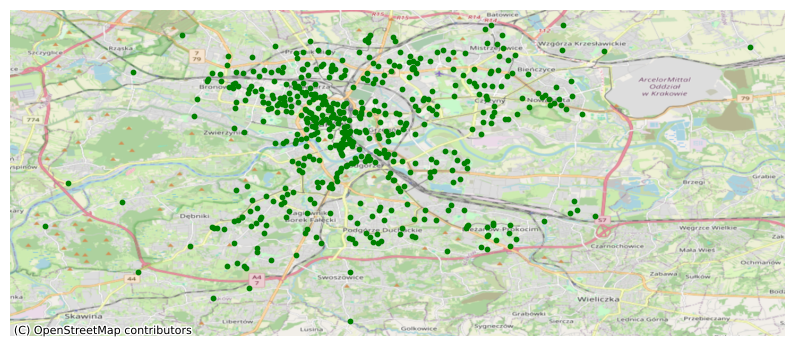

In [10]:
gdf = gpd.read_file('data/Zabki_Krakow.geojson')

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='green', markersize=10)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)
ax.set_axis_off()
plt.show()

In [11]:
gdf = gdf.to_crs(epsg=2180)
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

dist_matrix = pd.DataFrame(distance_matrix(gdf[['x', 'y']], gdf[['x', 'y']]), index=gdf.index, columns=gdf.index)
dist_matrix = dist_matrix.replace(0, np.inf)

shortest_distances = dist_matrix.min().sort_values()

shortest_distances = pd.DataFrame(shortest_distances, columns=['distance'])
shortest_distances['street'] = gdf.loc[shortest_distances.index, 'street'].values

shortest_distances.head(16)

,distance,street
18,8.932651,Lea 60/1a
230,8.932651,ul. J. Lea 99 lok. 3
193,12.352533,Bosacka 18 lok. -1-K011
435,12.352533,UL. BOSACKA 18 LOK.1K
389,12.540472,UL. PIŁSUDSKIEGO 7
257,12.540472,ul. Piłsudskiego 7
149,14.179978,Rusznikarska 14 a LOK. XIII
31,14.179978,Rusznikarska 14a
35,19.449544,Chmieleniec 2 D lok.L.U10
215,19.449544,Chmieleniec 2 lok. L.U10


Żabka shops that are less than 40 meters apart will be treated as duplicated

In [12]:
to_remove = shortest_distances[shortest_distances['distance'] < 40][::2].index
gdf = gdf.drop(to_remove)
gdf = gdf.reset_index(drop=True)
gdf.to_file('data/Zabki_Krakow.geojson', driver='GeoJSON')